In [1]:
import numpy as np
from skbio.stats.composition import ilr
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = '/Users/roberthart/Desktop'
colors = sns.color_palette("colorblind")

In [2]:
training_images = np.load(f'{path}/rotation/256_area.npz', allow_pickle=True)

training_images_names = list(training_images.files)
training_images_names = pd.Series(training_images_names, dtype='string')
training_images_names = training_images_names.str.replace("02_", "")
training_images_names = training_images_names.str.replace("01_", "")
training_images_names = training_images_names.str.replace("+3", "_right")
training_images_names = training_images_names.str.replace("+4", "_left")

quants_training_df =  pd.read_csv(f'{path}/quant_analysis/training.csv')
quants_training_df = quants_training_df[quants_training_df['name'].isin(training_images_names)]

quants_samples_df =  pd.read_csv(f'{path}/quant_analysis/samples.tsv', sep='\t')

In [3]:
#extract feature names and makes sure they're the same between both datasets

feature_names = None

#feature names samples
feature_names_samples = quants_samples_df.columns.tolist()
feature_names_samples = feature_names_samples[-4:]

#feature names training
feature_names_training = quants_training_df.columns.tolist()
feature_names_training = feature_names_training[-4:]

if (feature_names_samples == feature_names_training):
    feature_names = feature_names_samples
else:
    print('datasets are comparing different values!')
    

In [4]:
#ilr transform

quants_training = quants_training_df.to_numpy()[:, 1:5]
quants_training = quants_training.astype(float)
quants_training = np.where(quants_training == 0, 1e-6, quants_training)

quants_samples = quants_samples_df.to_numpy()[:, 1:5]
quants_samples = quants_samples.astype(float)
quants_samples = np.where(quants_samples == 0, 1e-6, quants_samples)

quants_training_ilr = ilr(quants_training)
quants_samples_ilr = ilr(quants_samples)

In [5]:
#perform PCA
combined_training_samples = np.vstack([quants_training_ilr, quants_samples_ilr])

pca = PCA(n_components=2) 
pca_result = pca.fit_transform(combined_training_samples)

colors = sns.color_palette("colorblind")


In [6]:
#find variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_

print(explained_variance_ratio)
print(components)

[0.64777783 0.27144171]
[[ 0.51937071 -0.31506985  0.79434568]
 [-0.00629867  0.92811287  0.37224565]]


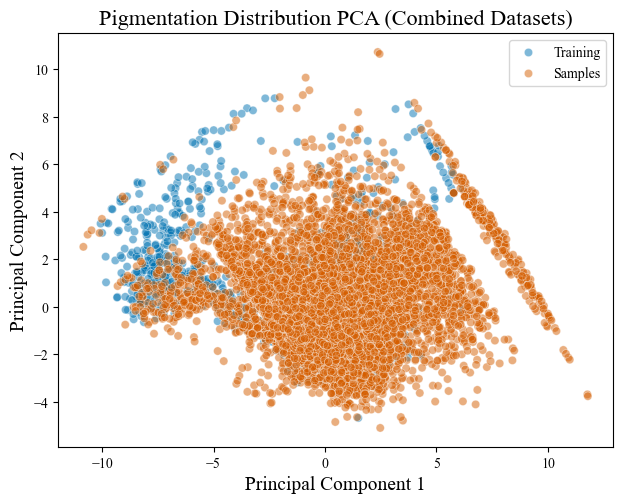

In [7]:
#show PCA of datapoints imposed on each other
plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(7.16, 5.37))
labels = np.array(['Training']*len(quants_training) + ['Samples']*len(quants_samples))
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Dataset'] = labels

custom_palette = {'Training': colors[0], 'Samples': colors[3]}

sns.scatterplot(x='PC1', y='PC2', hue='Dataset', data=pca_df, palette=custom_palette, alpha=0.5)
plt.title('Pigmentation Distribution PCA (Combined Datasets)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title=None)
plt.savefig('combined_color_representation.png', dpi=600)
plt.show()

In [8]:
#separate the data from the two PCAs
pca_training_df = pca_df[pca_df['Dataset'] == 'Training']
pca_samples_df = pca_df[pca_df['Dataset'] == 'Samples']

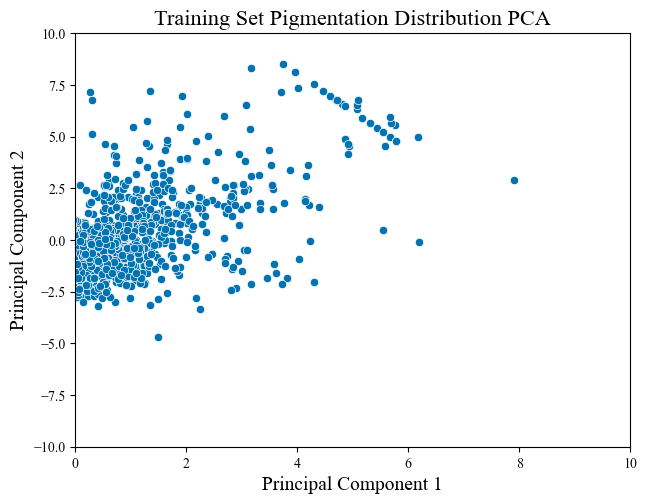

In [9]:
# Plot for the training PCA
plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(7.16, 5.37))
sns.scatterplot(x='PC1', y='PC2', data=pca_training_df, color=colors[0], alpha=1)
plt.title('Training Set Pigmentation Distribution PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlim(0, 10)
plt.ylim(-10, 10)
plt.savefig('training_set_color_representation.png', dpi=600)
plt.show()

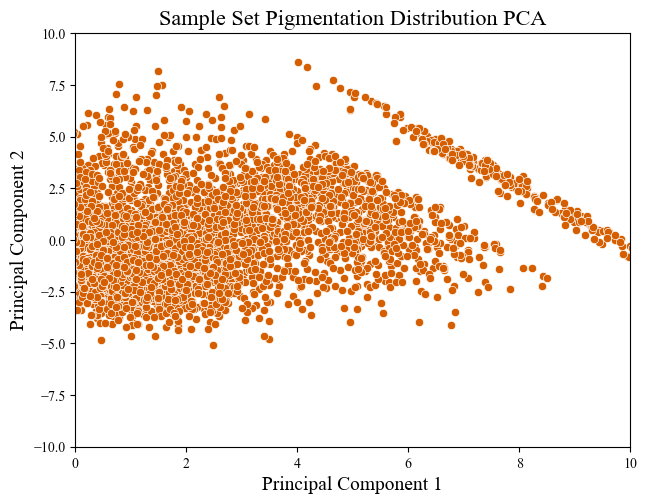

In [10]:
# Plot for the samples PCA
plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(7.16, 5.37))
sns.scatterplot(x='PC1', y='PC2', data=pca_samples_df, color=colors[3], alpha=1)
plt.title('Sample Set Pigmentation Distribution PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlim(0, 10)
plt.ylim(-10, 10)
plt.savefig('sample_set_color_representation.png', dpi=600)
plt.show()